Investigación sobre los factores que influyen en la expansión urbana en México

Análisis de los datos para 135 ciudades para analizar las siguientes correlaciones:

- ¿Existe una correlación entre los subsidios federales y la expansión urbana?
- ¿Existe una correlación entre la tasa de motorización y la expansión urbana?
- ¿Existe una correlación entre aumento en el ingreso y la expansión urbana?
- ¿Existe una correlación entre restricciones a la densidad y la expansión urbana?
- ¿Existe una correlación entre el decrecimiento del tamaño familiar y la expansión urbana?

Datos históricos: 1980, 2000, 2005 y 2010

Objetivo: analizar la tendencia histórica lo más posible. 


El análisis nos permitirá no es solo comprobar la correlación sino identificar que tan poderosas son las variables sobre las que sí podemos tener control: __subsidios federales y restricciones a la densidad. 

In [1]:
from __future__ import print_function
__author__ = 'mo'
import pylab as pl
import numpy as np
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gp
import json

import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 


import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
#import mplleaflet
#import shapely.geometry as geom
import networkx as nx
import xlrd

Populating the interactive namespace from numpy and matplotlib


In [92]:
base = pd.read_csv('basedatos6b.csv')
base.columns

Index([u'orden reporte', u'zm_flag', u'nombre_zm', u'nombre_zm_match_sina',
       u'nombre_zm_match', u'estado', u'clasificacion', u'pob_1980',
       u'pob_2000', u'pob_2005', u'pob_2010', u'cambio_pob', u'area_1980',
       u'area_2000', u'area_2005', u'area_2010', u'cambio_area', u'sub_2015',
       u'sub_2010', u'normativa', u'remuneraciones_1980',
       u'remuneraciones_2000', u'remunera_2009', u'remunera_2014',
       u'autos_2014', u'autos_1980', u'tasamoto_1980', u'autos_2000',
       u'tasamoto_2000', u'autos_2005', u'tasamoto_2005', u'autos_2010',
       u'tasamoto_2010', u'tam_fam_1980', u'tam_fam_2000', u'tam_fam_2005',
       u'tam_fam_2010'],
      dtype='object')

In [93]:
base

,orden reporte,zm_flag,nombre_zm,nombre_zm_match_sina,nombre_zm_match,estado,clasificacion,pob_1980,pob_2000,pob_2005,...,autos_2000,tasamoto_2000,autos_2005,tasamoto_2005,autos_2010,tasamoto_2010,tam_fam_1980,tam_fam_2000,tam_fam_2005,tam_fam_2010
0,14,0,Aguascalientes,Aguascalientes,Aguascalientes,Aguascalientes,500mil - 1 millon,359454,727582,834498,...,159812,219.6480946,252345,302.391378,338329,362.870280,NaN,NaN,4.080,3.900
1,6,0,Tijuana,Tijuana,Tijuana,Baja California,1 millon +,491797,1352035,1575026,...,321758,237.9805257,527091,334.655428,432319,246.837727,NaN,NaN,3.850,3.660
2,51,0,Ensenada,Ensenada,Ensenada,Baja California,100mil - 500mil,120483,231241,268716,...,105983,458.3227023,156173,581.182363,105767,366.486831,NaN,NaN,3.660,3.410
3,13,0,Mexicali,Mexicali,Mexicali,Baja California,500mil - 1 millon,510664,764602,855962,...,277569,363.0241616,422357,493.429615,283741,302.874813,NaN,NaN,3.670,3.690
4,59,0,La Paz,La Paz,La Paz,Baja California Sur,100mil - 500mil,91453,162954,189176,...,88423,542.6255262,160376,847.760815,195025,906.342656,NaN,NaN,3.650,3.470
5,102,0,San Jos_ del Cabo,San Jose del Cabo,San Jos_ del Cabo,Baja California Sur,50mil- 100mil,4369,38080,59325,...,40629,1066.938025,94182,1587.560051,194482,2222.956291,NaN,NaN,3.760,3.570
6,81,0,Cabo San Lucas,Cabo San Lucas,Cabo San Lucas,Baja California Sur,100mil - 500mil,4233,48143,87876,...,40629,843.9233118,94182,1071.760208,194482,1518.714323,NaN,NaN,3.760,3.570
7,57,0,Campeche,Campeche,Campeche,Campeche,100mil - 500mil,128434,190813,211671,...,34281,179.6575705,42017,198.501448,81826,357.834434,NaN,NaN,4.000,3.560
8,66,0,Ciudad del Carmen,Carmen,Carmen,Campeche,100mil - 500mil,72489,126024,154197,...,24577,195.0184092,32848,213.026194,65124,384.289474,NaN,NaN,3.830,3.730
9,24,0,Tuxtla Guti_rrez,Tuxtla Gutierrez,Tuxtla Guti_rrez,Chiapas,500mil - 1 millon,196785,523482,610714,...,74323,141.9781387,101299,165.869785,171631,250.865300,NaN,NaN,3.870,3.840


In [94]:
#setting up columns as variables to look at
#area in ha
area2010 = base['area_2010']
area2005 = base.area_2005
area2000 = base.area_2000
area1980 = base.area_1980

#population
pop2010 = base['pob_2010']
pop2005 = base.pob_2005
pop2000 = base.pob_2000
pop1980 = base.pob_1980

#rates of change
carea = base.cambio_area
cpop = base.cambio_pob

#motorization rate
moto1980 = base.tasamoto_1980
moto2000 = base.tasamoto_2000
moto2005 = base.tasamoto_2005
moto2010 = base.tasamoto_2010

#subisides
sub2010 = base.sub_2010

#Family size
fam2010 = base.tam_fam_2010
fam2005 = base.tam_fam_2005

#income
rem2009 = base.remunera_2009


In [50]:
#rem2009

# Exploratory analysis
## City areas heavily skewed to smaller sizes

In [58]:
print("% change area 1980-2010", carea.mean())
print("% change pop 1980-2010",cpop.mean())

% change area 1980-2010 11.5402319456
% change pop 1980-2010 4.40909498455


In [33]:
print("area 2010 min", area2010.min())
print("area 2010 max", area2010.max())

area 2010 min 841
area 2010 max 185291


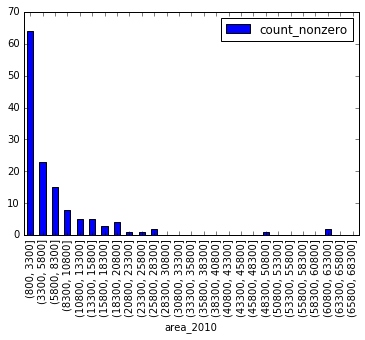

In [34]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(800, 70000, 2500)
area2010s = area2010.drop([19])
#area2010s.size
area2010s.groupby(pd.cut(area2010s, bins)).agg([count_nonzero]).plot(kind='bar')


In [35]:
print("area 2005 min", area2005.min())
print("area 2005 max", area2005.max())
area2005s = area2010.drop([19])
print("area 2005 max sin ZMVM", area2005s.max())


area 2005 min 689
area 2005 max 174616
area 2005 max sin ZMVM 63018


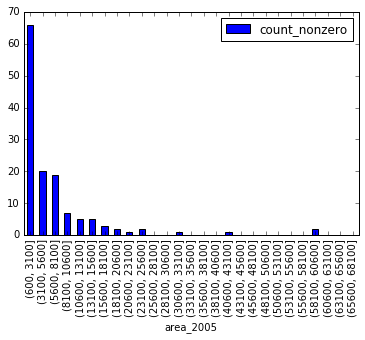

In [25]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(600, 70000, 2500)
area2005.groupby(pd.cut(area2005, bins)).agg([count_nonzero]).plot(kind='bar')


In [78]:
print("area 2000 min", area2000.min())
print("area 2000 max", area2000.max())
area2000s = area2000.drop([19])
print("area 2000 max sin ZMVM", area2000s.max())


area 2000 min 607
area 2000 max 167081
area 2000 max sin ZMVM 56619


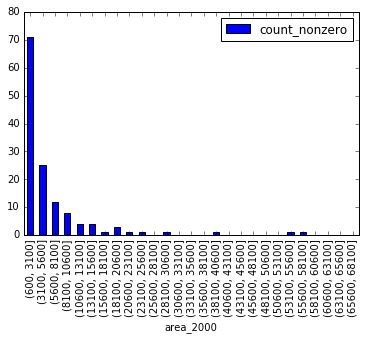

In [79]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(600, 70000, 2500)
area2000s.groupby(pd.cut(area2000s, bins)).agg([count_nonzero]).plot(kind='bar')


In [80]:
#area2000s.sort_values()
#we see that 54, 74, 86 are over 48, so we exclude these to get a better sense of distribution
area2000sm = area2000s.drop([54, 74, 86])
area2000sm.size
area2000sm.max()

29928

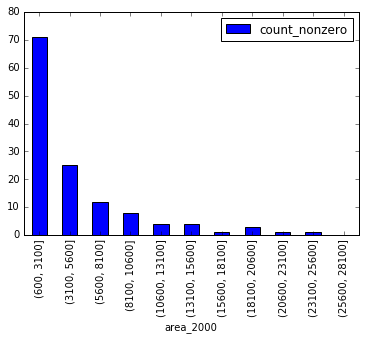

In [81]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(600, 30000, 2500)
area2000sm.groupby(pd.cut(area2000sm, bins)).agg([count_nonzero]).plot(kind='bar')


# Looking at trends and correlations

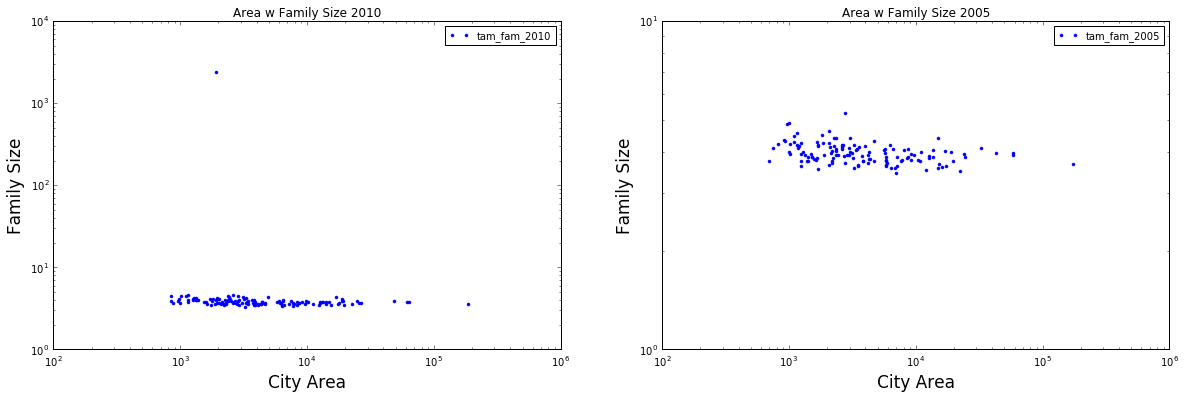

In [88]:
#area and family size
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(area2010, fam2010, '.')
pl.xlabel('City Area', fontsize=17)
pl.ylabel('Family Size', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
pl.title('Area w Family Size 2010')

pl.subplot(3,2,2)
pl.loglog(area2005, fam2005, '.')
pl.xlabel('City Area', fontsize=17)
pl.ylabel('Family Size', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
pl.title('Area w Family Size 2005')



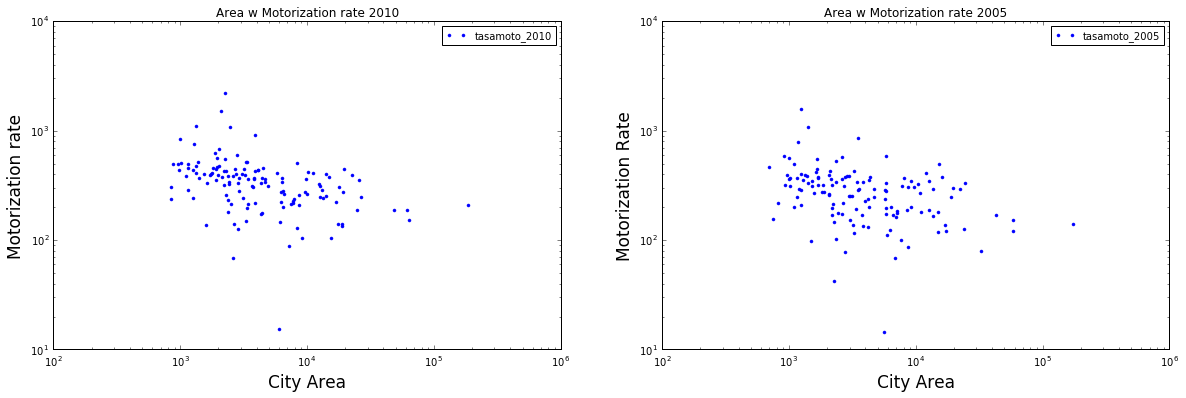

In [108]:
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(area2010, moto2010, '.')
pl.xlabel('City Area', fontsize=17)
pl.ylabel('Motorization rate', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
pl.title('Area w Motorization rate 2010')

pl.subplot(3,2,2)
pl.loglog(area2005, moto2005, '.')
pl.xlabel('City Area', fontsize=17)
pl.ylabel('Motorization Rate', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
pl.title('Area w Motorization rate 2005')


# Simple linear regression

In [40]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 

In [101]:
#Iarea
d = {'area2010': area2010, 'moto2010': moto2010, 'fam2010': fam2010, 'rem2009': rem2009, 'sub2010': sub2010}
# Run regression and print summary
mod = smf.ols(formula='area2010 ~ moto2010 + fam2010 + rem2009 + sub2010', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               area2010   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     6.128
Date:                Wed, 13 Apr 2016   Prob (F-statistic):           0.000151
Time:                        15:20:56   Log-Likelihood:                -1492.1
No. Observations:                 134   AIC:                             2994.
Df Residuals:                     129   BIC:                             3009.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -819.8502   4707.404     -0.174      0.8

In [102]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               area2010   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     6.128
Date:                Wed, 13 Apr 2016   Prob (F-statistic):           0.000151
Time:                        15:21:03   Log-Likelihood:                -1492.1
No. Observations:                 134   AIC:                             2994.
Df Residuals:                     129   BIC:                             3009.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -819.8502   4707.404     -0.174      0.862     -1.01e+04  8493.863
moto2010      -9.6108      5.760     -1.669      0.098       -21.007     1.785
fam2010        0.1697      7.138      0.024      0.981       -13.954    14.293
rem2009      134.7702     49.743      2.709      0.008        36.352   233.188
sub2010     9.942e-05    3.5e-05      2.844      0.005      3.03e-05     0.000
==============================================================================
Omnibus:                      224.741   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24267.518
Skew:                           7.203   Prob(JB):                         0.00
Kurtosis:                      67.334   Cond. No.                     1.59e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import csv

removal_list = set()
with open('pobexp1.csv', 'rb') as file_b:
    reader1 = csv.reader(file_b)
    next(reader1)
    for row in reader1:
        removal_list.add((row[0], row[2]))

In [104]:
#Iarea
d = {'area2010': area2010, 'rem2009': rem2009, 'sub2010': sub2010}
# Run regression and print summary
mod2 = smf.ols(formula='area2010 ~ rem2009 + sub2010', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               area2010   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     10.96
Date:                Wed, 13 Apr 2016   Prob (F-statistic):           3.94e-05
Time:                        15:27:47   Log-Likelihood:                -1504.2
No. Observations:                 135   AIC:                             3014.
Df Residuals:                     132   BIC:                             3023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4921.5625   3952.010     -1.245      0.2

In [105]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               area2010   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     10.96
Date:                Wed, 13 Apr 2016   Prob (F-statistic):           3.94e-05
Time:                        15:27:58   Log-Likelihood:                -1504.2
No. Observations:                 135   AIC:                             3014.
Df Residuals:                     132   BIC:                             3023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4921.5625   3952.010     -1.245      0.215     -1.27e+04  2895.904
rem2009      140.0936     49.270      2.843      0.005        42.633   237.554
sub2010        0.0001   3.48e-05      3.015      0.003       3.6e-05     0.000
==============================================================================
Omnibus:                      225.261   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23950.438
Skew:                           7.166   Prob(JB):                         0.00
Kurtosis:                      66.659   Cond. No.                     1.33e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""